In [2]:
import csv
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_food_production = pd.read_csv('Food_Production_tratado.csv')
df_food_production = df_food_production.drop('Unnamed: 0', axis = 'columns')
df_food_production


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6


In [4]:
df_food_production.shape
df_food_production.info()
df_food_production.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food product     43 non-null     object 
 1   Land use change  43 non-null     float64
 2   Animal Feed      43 non-null     float64
 3   Farm             43 non-null     float64
 4   Processing       43 non-null     float64
 5   Transport        43 non-null     float64
 6   Packging         43 non-null     float64
 7   Retail           43 non-null     float64
 8   Total_emissions  43 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.2+ KB


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000


Quais alimentos têm impacto mais negativo no meio ambiente?

Text(0.5, 1.0, 'Impacto ambiental por tipo de produto')

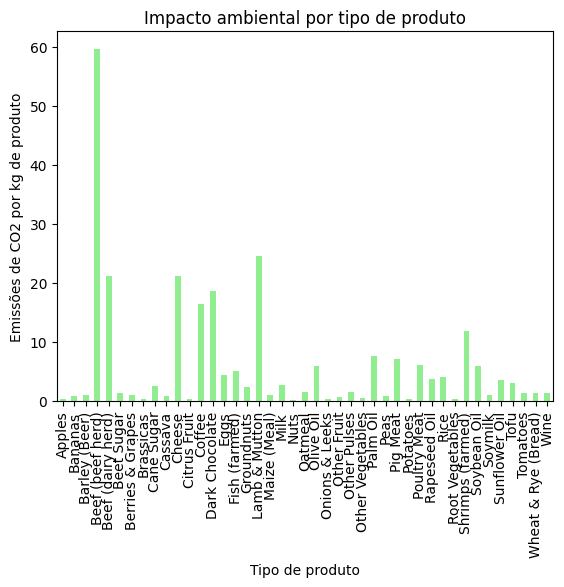

In [25]:
media_total_produto = df_food_production.groupby('Food product')['Total_emissions'].mean()
media_total_produto.plot(kind='bar', color='lightgreen')
plt.xlabel('Tipo de produto')
plt.ylabel('Emissões de CO2 por kg de produto')
plt.title('Impacto ambiental por tipo de produto')

Qual etapa da produção de alimentos contribui mais para a emissão de gases de efeito estufa?

Text(0.5, 1.0, 'Média de emissão de CO2 por estágio de produção')

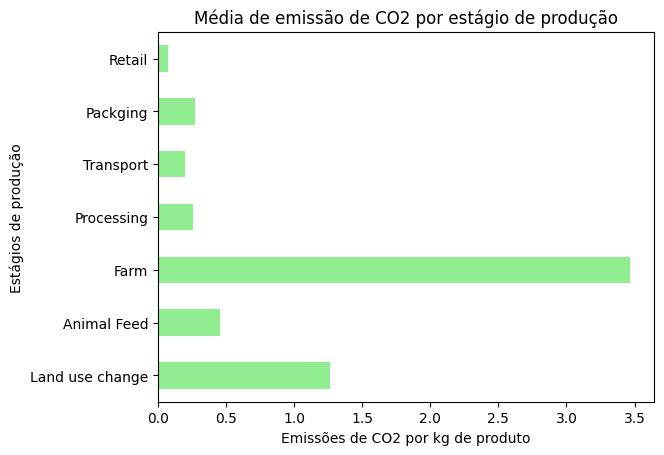

In [19]:
media_estagio = df_food_production[['Land use change','Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']].mean()
media_estagio.plot(kind='barh', color='lightgreen')
plt.xlabel('Emissões de CO2 por kg de produto')
plt.ylabel('Estágios de produção')
plt.title('Média de emissão de CO2 por estágio de produção')

Comparação da pegada de carbono por categoria de produto

Text(0.5, 1.0, 'Média de emissão de CO2 por tipo de óleo')

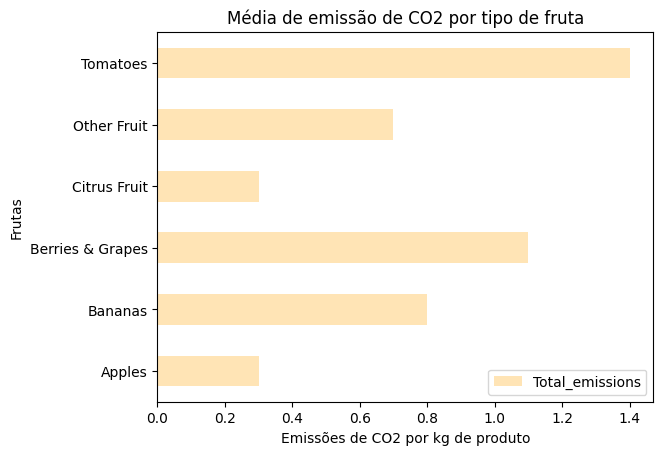

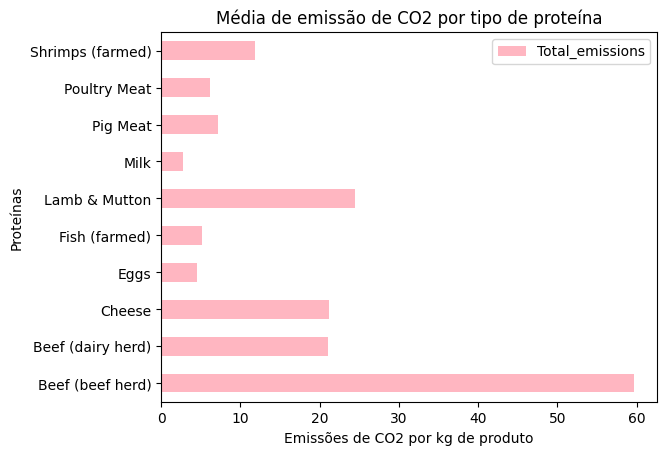

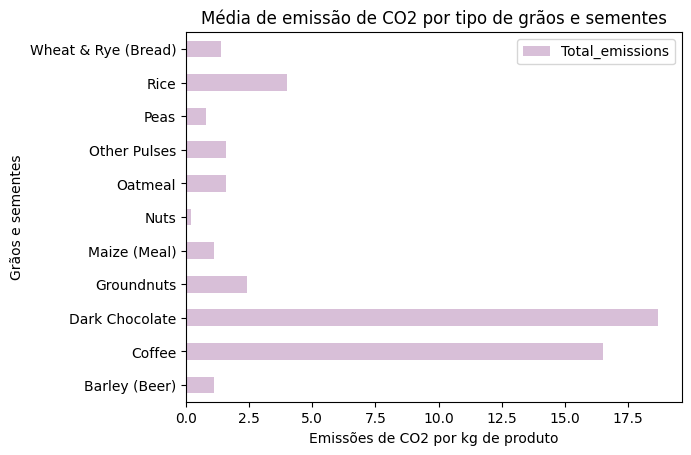

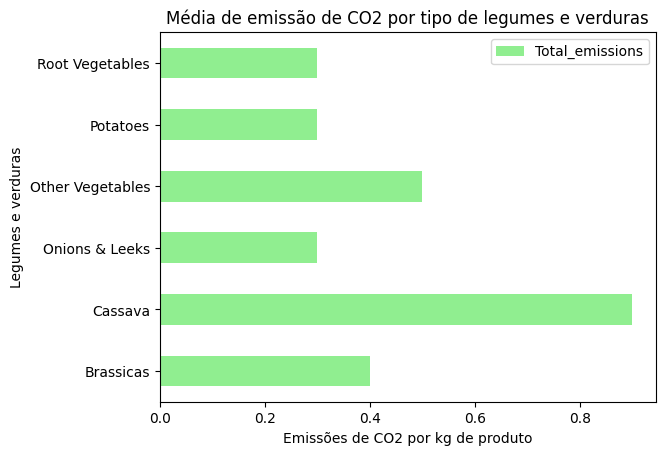

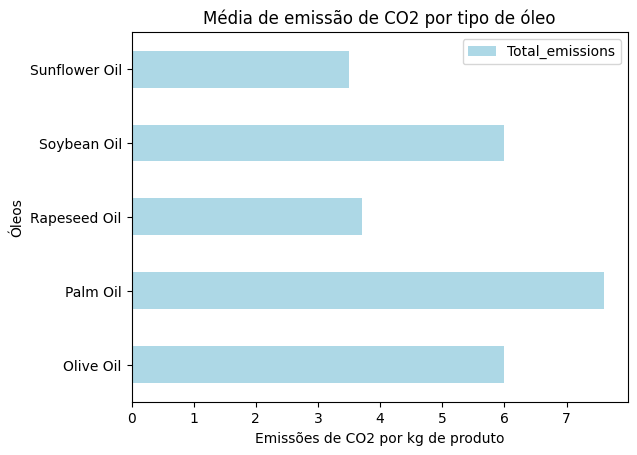

In [101]:
array_frutas = df_food_production[['Food product','Total_emissions']].loc[[20, 25, 26, 27, 28, 30]]
media_impacto_frutas = array_frutas.groupby('Food product').mean()
media_impacto_frutas.plot(kind='barh', color='moccasin')
plt.xlabel('Emissões de CO2 por kg de produto')
plt.ylabel('Frutas')
plt.title('Média de emissão de CO2 por tipo de fruta')

array_proteinas = df_food_production[['Food product','Total_emissions']].loc[[33, 34, 35, 36, 37, 38, 39, 40, 41, 42]]
media_impacto_proteinas = array_proteinas.groupby('Food product').mean()
media_impacto_proteinas.plot(kind='barh', color='lightpink')
plt.xlabel('Emissões de CO2 por kg de produto')
plt.ylabel('Proteínas')
plt.title('Média de emissão de CO2 por tipo de proteína')

array_graos = df_food_production[['Food product','Total_emissions']].loc[[0, 1, 2, 3, 4, 9, 10, 11, 12, 31, 32]]
media_impacto_graos = array_graos.groupby('Food product').mean()
media_impacto_graos.plot(kind='barh', color='thistle')
plt.xlabel('Emissões de CO2 por kg de produto')
plt.ylabel('Grãos e sementes')
plt.title('Média de emissão de CO2 por tipo de grãos e sementes')

array_legumes = df_food_production[['Food product','Total_emissions']].loc[[5, 6, 21, 22, 23, 24]]
media_impacto_legumes = array_legumes.groupby('Food product').mean()
media_impacto_legumes.plot(kind='barh', color='lightgreen')
plt.xlabel('Emissões de CO2 por kg de produto')
plt.ylabel('Legumes e verduras')
plt.title('Média de emissão de CO2 por tipo de legumes e verduras')

array_oleos = df_food_production[['Food product','Total_emissions']].loc[[15, 16, 17, 18, 19]]
media_impacto_oleos = array_oleos.groupby('Food product').mean()
media_impacto_oleos.plot(kind='barh', color='lightblue')
plt.xlabel('Emissões de CO2 por kg de produto')
plt.ylabel('Óleos')
plt.title('Média de emissão de CO2 por tipo de óleo')


Pegada de carbono por estágios de produção e categoria de produto

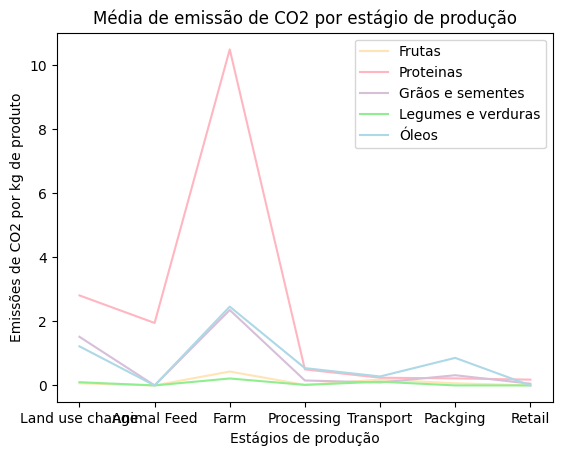

In [109]:
array_frutas = df_food_production[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].loc[[20, 25, 26, 27, 28, 30]].mean()
array_frutas.plot(color='moccasin')
plt.xlabel('Estágios de produção')
plt.ylabel('Emissões de CO2 por kg de produto')

array_proteinas = df_food_production[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].loc[[33, 34, 35, 36, 37, 38, 39, 40, 41, 42]].mean()
array_proteinas.plot(color='lightpink')
plt.xlabel('Estágios de produção')
plt.ylabel('Emissões de CO2 por kg de produto')

array_graos = df_food_production[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].loc[[0, 1, 2, 3, 4, 9, 10, 11, 12, 31, 32]].mean()
array_graos.plot(color='thistle')
plt.xlabel('Estágios de produção')
plt.ylabel('Emissões de CO2 por kg de produto')

array_legumes = df_food_production[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].loc[[5, 6, 21, 22, 23, 24]].mean()
array_legumes.plot(color='lightgreen')
plt.xlabel('Estágios de produção')
plt.ylabel('Emissões de CO2 por kg de produto')

array_oleos = df_food_production[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].loc[[15, 16, 17, 18, 19]].mean()
array_oleos.plot(color='lightblue')
plt.xlabel('Estágios de produção')
plt.ylabel('Emissões de CO2 por kg de produto')

plt.title('Média de emissão de CO2 por estágio de produção')
plt.legend(['Frutas', 'Proteinas', 'Grãos e sementes', 'Legumes e verduras', 'Óleos'])
